In [5]:
pip install ucimlrepo

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [50]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)





In [51]:
data = cdc_diabetes_health_indicators.data
df = pd.DataFrame(data.features, columns=data.feature_names)
df['target'] = data.targets

# Handling categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

# Split data into features and target
X = df.drop('target', axis=1).values
y = df['target'].values

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)


Epoch 1/20
2379/2379 [==============================] - 10s 3ms/step - loss: 0.3231 - accuracy: 0.8619 - val_loss: 0.3120 - val_accuracy: 0.8669
Epoch 2/20
2379/2379 [==============================] - 8s 3ms/step - loss: 0.3176 - accuracy: 0.8646 - val_loss: 0.3126 - val_accuracy: 0.8675
Epoch 3/20
2379/2379 [==============================] - 6s 3ms/step - loss: 0.3164 - accuracy: 0.8654 - val_loss: 0.3133 - val_accuracy: 0.8670
Epoch 4/20
2379/2379 [==============================] - 7s 3ms/step - loss: 0.3157 - accuracy: 0.8658 - val_loss: 0.3119 - val_accuracy: 0.8679
Epoch 5/20
2379/2379 [==============================] - 8s 4ms/step - loss: 0.3151 - accuracy: 0.8654 - val_loss: 0.3118 - val_accuracy: 0.8672
Epoch 6/20
2379/2379 [==============================] - 7s 3ms/step - loss: 0.3145 - accuracy: 0.8660 - val_loss: 0.3121 - val_accuracy: 0.8671
Epoch 7/20
2379/2379 [==============================] - 8s 3ms/step - loss: 0.3145 - accuracy: 0.8659 - val_loss: 0.3118 - val_accuracy

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


1586/1586 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.8674
Test Accuracy: 0.8674, Test Loss: 0.3088


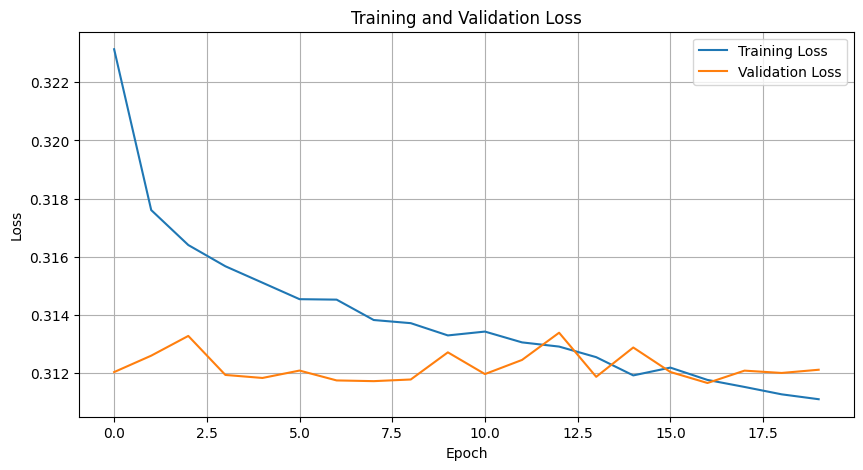

In [59]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
test_losses = []
for epoch in range(20):  # Assuming 20 epochs
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=64)  # Train for one epoch at a time
    test_loss, _ = model.evaluate(X_test, y_test)  # Evaluate on test set
    test_losses.append(test_loss)  # Append test loss


1586/1586 [==============================] - 2s 2ms/step - loss: 0.3112 - accuracy: 0.8662


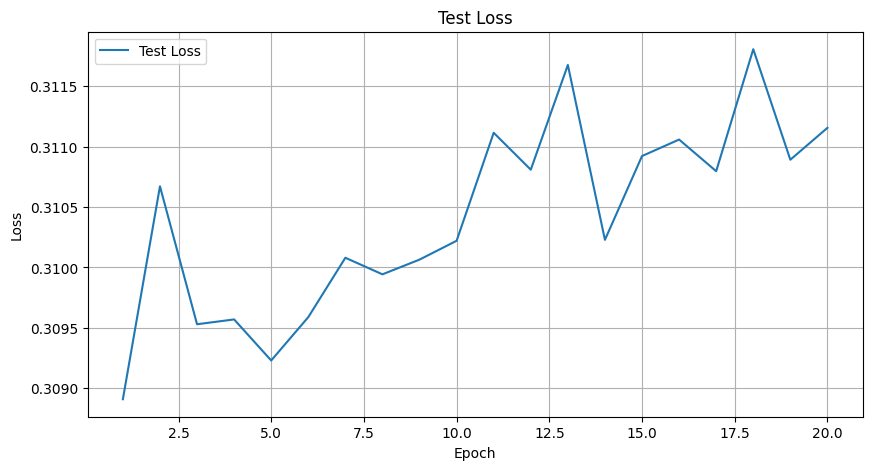

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), test_losses, label='Test Loss')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
